# Contents:

#### Importing libraries and data frames
#### Creating a region flag
#### Crossing the region flag with the spending flag
#### Creating an exclusion flag for customers with under 5 orders
#### Creating customer profiling variables (family status, vegan status, and age categories)
#### Grouping and aggregation (order frequency and expenditure)
#### Visualizations
#### Crosstabulation and aggregation of customer profiling variables
#### Saving and exporting to a pkl file

## Importing libraries and data frames

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
path=r'C:\Users\Shelb\OneDrive\Documents\CF Coursework\Python Fundamentals for Data Analysts\10-2022 Instacart Basket Analysis'

In [3]:
# To establish the integrated data set as a dataframe object
df=pd.read_pickle(os.path.join(path,'Data','Prepared Data','11-17_integrated_data.pkl'))

In [4]:
# To drop unneeded _merge column
df.drop(columns={'_merge'},inplace=True)

## Creating a region flag

In [5]:
# defining regions as list objects
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [6]:
# creating an empty list and for loop logic
result=[]

for value in df['state']:
    if value in northeast:
        result.append('Northeast')
    elif value in midwest:
        result.append('Midwest')
    elif value in south:
        result.append('South')
    elif value in west:
        result.append('West')

In [7]:
# creating the region column based on the for loop results
df['regions']=result

In [8]:
# To check the value counts in the regions column
df['regions'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: regions, dtype: int64

In [9]:
# To check that the regions column is the same length as the rest of the data frame
len(df['regions'])

32404859

In [10]:
df.head()

,order_id,user_id,order_number,order_day_of_week,hour_order_placed,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,dependants,fam_status,income,regions
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


## Crossing the region flag with the spending flag

In [11]:
# Creating a crosstab to determine difference in spending power across regions
crosstab=pd.crosstab(df['regions'],df['spending_flag'],dropna=False)

In [12]:
crosstab.to_clipboard()

In [13]:
crosstab

spending_flag,High spender,Low spender
regions,,
Midwest,2497034,5100291
Northeast,1875170,3847566
South,3549625,7242260
West,2722093,5570820


#### Each region has very similar proportions of high vs. low spenders (around 33% high spenders and 67% low spenders)

## Creating an exclusion flag for customers with under 5 orders

In [14]:
# To create an activity flag based on max_order
df.loc[df['max_order']>=5,'activity']='normal'
df.loc[df['max_order']<5,'activity']='low'

In [15]:
# To check the value counts in the activity flag column
df['activity'].value_counts()

normal    30964564
low        1440295
Name: activity, dtype: int64

In [16]:
# To check that the length of the activity column matches the dataframe
len(df['activity'])

32404859

In [17]:
# To create a dataframe containing only low activity customers
df_low=df[df['activity']=='low']

In [18]:
df_low.head()

,order_id,user_id,order_number,order_day_of_week,hour_order_placed,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,last_name,gender,state,age,date_joined,dependants,fam_status,income,regions,activity
1510,520620,120,1,3,11,NaN,True,196,2,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1511,3273029,120,3,2,8,19.0,False,196,2,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1512,520620,120,1,3,11,NaN,True,46149,1,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1513,3273029,120,3,2,8,19.0,False,46149,1,1,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1514,520620,120,1,3,11,NaN,True,26348,3,0,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low


In [19]:
df_low.shape

(1440295, 33)

In [20]:
# Exporting low activity sample as a pkl file
df_low.to_pickle(os.path.join(path,'Data','Prepared Data','low_activity_user_data.pkl'))

In [21]:
# creating a dataframe with only normal activity customers
df2=df[df['activity']=='normal']

In [22]:
df2.head()

,order_id,user_id,order_number,order_day_of_week,hour_order_placed,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,last_name,gender,state,age,date_joined,dependants,fam_status,income,regions,activity
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
2,473747,1,3,3,12,21.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
4,431534,1,5,4,15,28.0,False,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal


In [23]:
df2.shape

(30964564, 33)

## Creating customer profiling variables

In [24]:
df2.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'hour_order_placed', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag',
       'avg_days_since_last_order', 'order_frequency', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'fam_status', 'income', 'regions', 'activity'],
      dtype='object')

### Family status

In [25]:
# To create a family status flag to find parents of young children, parents of older children, and people with no children
# Department id # 18 is designated 'babies' and will be used here to identify families with young children
df2.loc[(df['department_id']==18)&(df['dependants']>0),'family_status']='family with young children'
df2.loc[(df['department_id']!=18)&(df['dependants']>0),'family_status']='family with older children'
df2.loc[df['dependants']==0,'family_status']='no children'

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\2531846769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[(df['department_id']==18)&(df['dependants']>0),'family_status']='family with young children'


In [26]:
df2['family_status'].value_counts()

family with older children    22917819
no children                    7739681
family with young children      307064
Name: family_status, dtype: int64

In [27]:
len(df2['family_status'])

30964564

In [28]:
len(df2)

30964564

### Vegan status

In [29]:
# To create logic for a vegan flag
# Department numbers 12, 16 and 20 are meat and seafood, dairy and eggs, and deli respectively and are not vegan
result=[]

for value in df2['department_id']:
    if value in (12,16,20):
        result.append('not vegan')
    else:
        result.append('vegan')

In [30]:
df2['vegan_status']=result

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\2869749955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vegan_status']=result


In [31]:
len(df2['vegan_status'])

30964564

In [32]:
df2['vegan_status'].value_counts()

vegan        24108767
not vegan     6855797
Name: vegan_status, dtype: int64

### Age categories

In [33]:
# To create a column grouping age into categories
df2.loc[(df2['age']>=18)&(df2['age']<=29),'age_category']='college age'
df2.loc[(df2['age']>=30)&(df2['age']<=39),'age_category']='young adult'
df2.loc[(df2['age']>=40)&(df2['age']<=49),'age_category']='middle age adult'
df2.loc[(df2['age']>=50)&(df2['age']<=59),'age_category']='late career adult'
df2.loc[df2['age']>60,'age_category']='senior'

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\613781678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[(df2['age']>=18)&(df2['age']<=29),'age_category']='college age'


In [34]:
len(df2['age_category'])

30964564

In [35]:
df2['age_category'].value_counts()

senior               10112607
college age           5817603
middle age adult      4883179
young adult           4847507
late career adult     4841771
Name: age_category, dtype: int64

## Grouping and aggregating

In [36]:
# Creating a min_useage_frequency column based on days_since_prior_order
# Outputs displayed in _useage_frequency_columns are the most days the customer has gone since their last instacart order
df2['min_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.max)

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\3211801858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['min_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.max)


In [37]:
# To change the data type to one which will take up less memory space
df2['min_usage_frequency']=df2['min_usage_frequency'].astype('int32')

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\2243910198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['min_usage_frequency']=df2['min_usage_frequency'].astype('int32')


In [38]:
# To check the length of the output
len(df2['min_usage_frequency'])

30964564

In [39]:
df2['max_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.min)

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\461113080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.min)


In [40]:
df2['max_usage_frequency']=df2['max_usage_frequency'].astype('int32')

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\1068895488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_usage_frequency']=df2['max_usage_frequency'].astype('int32')


In [41]:
len(df2['max_usage_frequency'])

30964564

In [42]:
df2['average_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.mean)

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\2260905509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['average_usage_frequency']=df2.groupby(['user_id'])['days_since_prior_order'].transform(np.mean)


In [43]:
df2['average_usage_frequency']=df2['average_usage_frequency'].astype('int32')

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\1259258902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['average_usage_frequency']=df2['average_usage_frequency'].astype('int32')


In [44]:
len(df2['average_usage_frequency'])

30964564

In [45]:
df2.head()

,order_id,user_id,order_number,order_day_of_week,hour_order_placed,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,fam_status,income,regions,activity,family_status,vegan_status,age_category,min_usage_frequency,max_usage_frequency,average_usage_frequency
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20
1,2398795,1,2,3,7,15.0,False,196,1,1,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20
2,473747,1,3,3,12,21.0,False,196,1,1,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20
3,2254736,1,4,4,7,29.0,False,196,1,1,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20
4,431534,1,5,4,15,28.0,False,196,1,1,...,married,40423,South,normal,family with older children,vegan,young adult,30,0,20


In [46]:
# To create customer expenditure aggregation variables and check the length of each new column
df2['max_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.max)

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\1186780747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.max)


In [47]:
# To change the data type to one which will take up less memory space
df2['max_expenditure']=df2['max_expenditure'].astype('int32')

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\3845791414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['max_expenditure']=df2['max_expenditure'].astype('int32')


In [48]:
len(df2['max_expenditure'])

30964564

In [49]:
df2['min_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.min)

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\60051554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['min_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.min)


In [50]:
df2['min_expenditure']=df2['min_expenditure'].astype('int32')

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\474183579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['min_expenditure']=df2['min_expenditure'].astype('int32')


In [51]:
len(df2['min_expenditure'])

30964564

In [52]:
df2['avg_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.mean)

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\1376841998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_expenditure']=df2.groupby(['user_id'])['prices'].transform(np.mean)


In [53]:
df2['avg_expenditure']=df2['avg_expenditure'].astype('int32')

C:\Users\Shelb\AppData\Local\Temp\ipykernel_17524\3032774477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_expenditure']=df2['avg_expenditure'].astype('int32')


In [54]:
len(df2['avg_expenditure'])

30964564

In [55]:
df2.head()

,order_id,user_id,order_number,order_day_of_week,hour_order_placed,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,activity,family_status,vegan_status,age_category,min_usage_frequency,max_usage_frequency,average_usage_frequency,max_expenditure,min_expenditure,avg_expenditure
0,2539329,1,1,2,8,NaN,True,196,1,0,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6
1,2398795,1,2,3,7,15.0,False,196,1,1,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6
2,473747,1,3,3,12,21.0,False,196,1,1,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6
3,2254736,1,4,4,7,29.0,False,196,1,1,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6
4,431534,1,5,4,15,28.0,False,196,1,1,...,normal,family with older children,vegan,young adult,30,0,20,14,1,6


## Visualizations

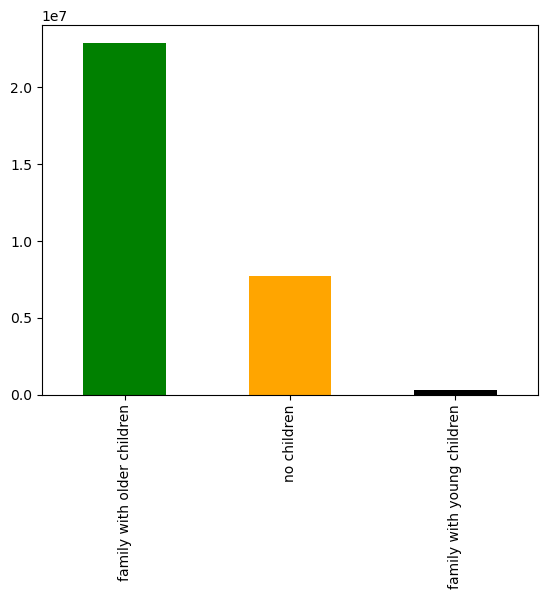

In [56]:
# To create a bar graph showing the distribution of the family_status column
fam_status_bar=df2['family_status'].value_counts().plot.bar(color=['green','orange','black'])

#### Instacart's orders are primarily from families with older children (children who have aged out of needing items from the baby aisle).

In [57]:
# To save the fam_status_bar chart as a PNG
fam_status_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','fam_status_bar.png'))

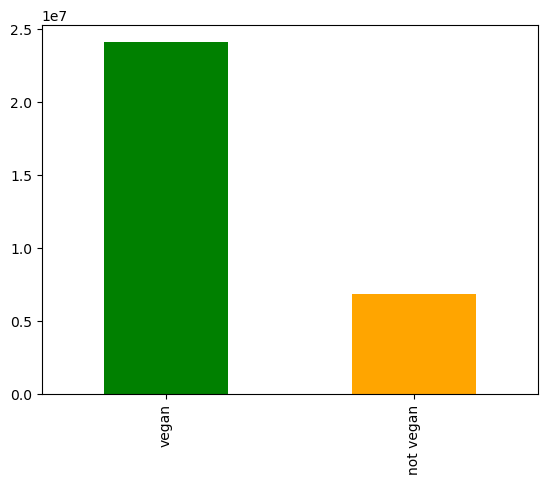

In [58]:
# To create a bar chart from the vegan_status column
veg_status_bar=df2['vegan_status'].value_counts().plot.bar(color=['green','orange'])

#### Instacart receives more orders fromvegan customers (those who do not purchase meat, seafood, dairy, eggs, or deli items) than non-vegan customers. However, there is a possibility that some of these 'vegan' shoppers might not actually be vegans, but avoid buying non-vegan grocery items online due to concerns about quality and/or freshness. More data about customer perception of product quality is necessary to determine whether this is the case.

In [59]:
# To save the veg_status_bar chart as a PNG
veg_status_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','veg_status_bar.png'))

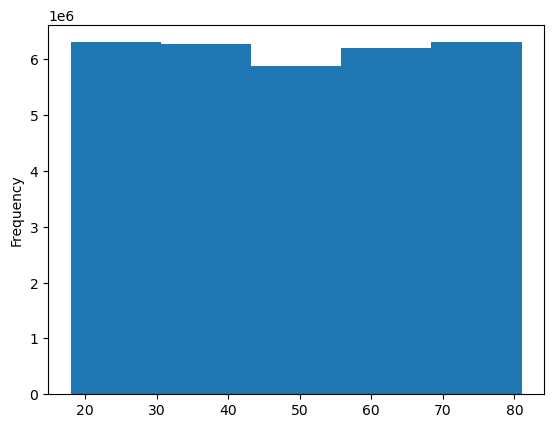

In [60]:
# To create a histogram of the age column
age_hist=df2['age'].plot.hist(bins=5)

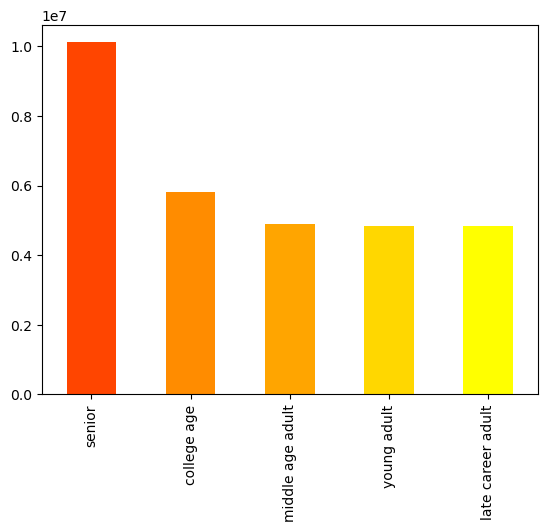

In [61]:
# To create a bar graph of the age_category column
age_cat_bar=df2['age_category'].value_counts().plot.bar(color=['orangered','darkorange','orange','gold','yellow'])

#### Both the age categories bar chart and the age histogram suggest that most of instacart's orders are from custoemrs in the senior age group (adults over 60), followed by those in the college age group (adults aged 18 to 29). The age category with the least instacart orders is the late career adult category (users in their 50s). 

In [62]:
# To save age_hist as a PNG
age_hist.figure.savefig(os.path.join(path,'Analysis','Visualizations','age_hist.png'))

In [63]:
# To save age_cat_bar as a PNG
age_cat_bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','age_category_bar.png'))

## Crosstabulating and aggregating customer profile variables

In [64]:
# To crosstuabulate customer family status by region
crosstab_fam_status=pd.crosstab(df2['regions'],df2['family_status'],dropna=False)

In [65]:
crosstab_fam_status

family_status,family with older children,family with young children,no children
regions,,,
Midwest,5367664,71033,1822816
Northeast,4055516,54687,1354482
South,7624975,104231,2581933
West,5869664,77113,1980450


In [66]:
crosstab_fam_status.to_clipboard()

In [67]:
# To crosstabulate vegan status by region
crosstab_veg_status=pd.crosstab(df2['regions'],df2['vegan_status'],dropna=False)

In [68]:
crosstab_veg_status

vegan_status,not vegan,vegan
regions,,
Midwest,1605214,5656299
Northeast,1211585,4253100
South,2280756,8030383
West,1758242,6168985


In [69]:
crosstab_veg_status.to_clipboard()

In [70]:
crosstab_age_category=pd.crosstab(df2['regions'],df2['age_category'],dropna=False)

In [71]:
crosstab_age_category

age_category,college age,late career adult,middle age adult,senior,young adult
regions,,,,,
Midwest,1355838,1148268,1174801,2356770,1127163
Northeast,1023984,849153,859566,1809013,847753
South,1960651,1580347,1601124,3361229,1647596
West,1477130,1264003,1247688,2585595,1224995


In [72]:
crosstab_age_category.to_clipboard()

In [73]:
df2.shape

(30964564, 42)

In [75]:
# To count the values of family_status
df2['family_status'].value_counts()

family with older children    22917819
no children                    7739681
family with young children      307064
Name: family_status, dtype: int64

In [79]:
# To aggregate the average amount spent by each family status category
df2.groupby('family_status')['avg_expenditure'].mean()

family_status
family with older children    7.291404
family with young children    7.329654
no children                   7.289405
Name: avg_expenditure, dtype: float64

In [80]:
# To aggregate the average amount spent by age category
df2.groupby('age_category')['avg_expenditure'].mean()

age_category
college age          7.279466
late career adult    7.282755
middle age adult     7.303909
senior               7.296239
young adult          7.290676
Name: avg_expenditure, dtype: float64

In [81]:
# To aggregate the average amount spent by vegan status
df2.groupby('vegan_status')['avg_expenditure'].mean()

vegan_status
not vegan    7.356727
vegan        7.272673
Name: avg_expenditure, dtype: float64

## Saving and exporting the final data set

In [74]:
df2.to_pickle(os.path.join(path,'Data','Prepared Data','11-22_final_dataset.pkl'))

KeyboardInterrupt: 